# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [193]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [254]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [195]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [196]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [197]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [198]:
data['found']

260

Количество страниц в результатах поиска

In [199]:
data['pages']

3

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [200]:
df = pd.json_normalize(data['items'])
df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,77469811,False,Senior Data Scientist (команда Ads Platform),NaN,False,False,None,None,2023-02-28T10:29:05+0300,2023-02-28T10:29:05+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,77421621,False,Middle/Senior Data Scientist в направление Рек...,NaN,False,False,None,None,2023-02-27T11:57:40+0300,2023-02-27T11:57:40+0300,...,NaN,NaN,NaN,NaN,NaN,mts-3776-it,"«МТС», IT",NaN,NaN,NaN
97,74047078,False,Data Scientist,NaN,False,False,None,None,2023-02-14T16:57:34+0300,2023-02-14T16:57:34+0300,...,9.128,9,55.794054,37.587163,NaN,NaN,NaN,NaN,NaN,NaN
98,77316163,False,Data Scientist (DMAG),NaN,False,False,None,None,2023-02-22T10:26:38+0300,2023-02-22T10:26:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [245]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [246]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [313]:
markers = ['NLP', 'аналитик данных', 'Data Scientist', 'Data Analyst', 'ML', 'DS',
           'Big Data', 'анализ данных', 'искуственн']

def is_data_scientist(name):
    '''
    Сделаем явную проверку по кодовым словам, чтобы 
    в конечной таблице было меньше неподходящих вакансий
    '''
    
    for m in markers:
        if m.lower() in name.lower():
            return True
    return False

In [315]:
URL = 'https://api.hh.ru/vacancies'

def get_vacancies(job):
    '''
    Будем обращаться к API и брать по 100 вакансий за один запрос
    Далее получим подробную информацию по каждой полученной вакансии и
    добавим её в итоговую таблицу
    '''
    
    params = {
        'text': job,
        'area': 1,
        'page': 0,
        'per_page': 100
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    
    df = pd.DataFrame()
    
    sleep(0.7)
    
    for page in range(data['pages']):
        
        _params = {
            'text': job,
            'area': 1,
            'page': page,
            'per_page': 100
        }

        _req = requests.get(URL, _params)
        _data = json.loads(_req.content.decode()) 
        
        _df = pd.json_normalize(_data['items'])
        
        _df['is_valid'] = _df['name'].apply(is_data_scientist)
        _df = _df[_df['is_valid'] == True]
        
        sleep(0.7)
        
        for i in range(_df.shape[0]):
            
            vacancy = _df['id'].iloc[i]
            vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

            req = requests.get(vacancy_url)
            vacancy_info = json.loads(req.content.decode())
            
            vacancy_pd = pd.json_normalize(vacancy_info)        
            df = pd.concat([df, vacancy_pd])
            
            sleep(0.7)
                
    return df

In [316]:
vacancies = pd.DataFrame()

job_names = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'ML Engineer', 'ML Researcher', 'аналитик данных']

for job in job_names:
    _vacancies = get_vacancies(job)
    vacancies = pd.concat([vacancies, _vacancies])

In [329]:
vacancies.head()

,level_0,index,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,department,...,vacancy_constructor_template.id,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path
0,0,0,74376536,False,[],Data scientist,None,False,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,77613664,False,[],Data Scientist,None,False,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,74257661,False,[],Data scientist,None,False,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,77604691,False,[],Junior Data Scientist (отдел исследований и мо...,None,False,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,77656158,False,[],Data Scientist Intern,None,False,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [332]:
vacancies = vacancies.drop_duplicates(subset=['id']).reset_index(drop=True)
vacancies.head()

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,department,contacts,description,...,vacancy_constructor_template.id,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path
0,74376536,False,[],Data scientist,None,False,True,None,None,<strong>Обязанности:</strong> <ul> <li>Работа ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,[],Data Scientist,None,False,True,None,None,<p>Привет! Наша аналитическая команда занимает...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,[],Data scientist,None,False,True,None,None,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77604691,False,[],Junior Data Scientist (отдел исследований и мо...,None,False,True,None,None,<p>В нашу команду исследований и моделирования...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77656158,False,[],Data Scientist Intern,None,False,True,None,None,<p>Международная ĸомпания Hotellab.io является...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [310]:
import openpyxl
vacancies.to_excel("vacancies.xlsx") 

Выберем только важные для анализа признаки такие, как зарплата, расположение, необходимые качества и др.

In [436]:
features = ['id', 'name', 'description', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'address.lat', 'address.lng', 'key_skills']

In [497]:
df = vacancies[features].copy()
df.head()

,id,name,description,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,key_skills
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,200000.0,240000.0,RUR,False,55.838091,37.417167,"[{'name': 'Python'}, {'name': 'PyTorch'}, {'na..."
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,150000.0,200000.0,RUR,False,NaN,NaN,"[{'name': 'Python'}, {'name': 'ML'}, {'name': ..."
2,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,150000.0,300000.0,RUR,False,55.718035,37.502857,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
3,77604691,Junior Data Scientist (отдел исследований и мо...,<p>В нашу команду исследований и моделирования...,NaN,NaN,NaN,NaN,55.784152,37.579205,[]
4,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,40000.0,50000.0,RUR,True,56.838011,60.597465,"[{'name': 'Revenue Management'}, {'name': 'Inf..."


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [498]:
df.shape[0]

563

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Для этого распарсим колонку с навыками, далее, просто посчитаем количество вхождений для каждого.

In [500]:
def parse_skills(skills):
    '''
    Распарсим список словарей
    '''
    parsed = []
    for i in range(len(skills)):
        parsed.append(skills[i]['name'])
    return parsed

df['key_skills'] = df['key_skills'].apply(parse_skills)

In [501]:
from collections import defaultdict
skills = defaultdict(lambda: 0)

for i in range(df.shape[0]):
    for skill in df['key_skills'].iloc[i]:
        skills[skill] += 1
        
top_skills = []
for k, v in skills.items():
    top_skills.append((k, v))
    
top_skills.sort(key=lambda x: x[1], reverse = True)
top_skills = top_skills[:15]
top_skills

[('Python', 279),
 ('SQL', 279),
 ('Анализ данных', 87),
 ('Аналитическое мышление', 64),
 ('Hadoop', 53),
 ('Математическая статистика', 52),
 ('ML', 51),
 ('Big Data', 49),
 ('MS SQL', 47),
 ('Machine Learning', 46),
 ('Data Analysis', 46),
 ('Spark', 45),
 ('Git', 36),
 ('Data Science', 35),
 ('Power BI', 34)]

In [502]:
data = pd.DataFrame(top_skills).rename(columns={0: 'skill', 1: 'num_req'})
data

,skill,num_req
0,Python,279
1,SQL,279
2,Анализ данных,87
3,Аналитическое мышление,64
4,Hadoop,53
5,Математическая статистика,52
6,ML,51
7,Big Data,49
8,MS SQL,47
9,Machine Learning,46


Text(0.5, 1.0, 'Требования к навыкам')

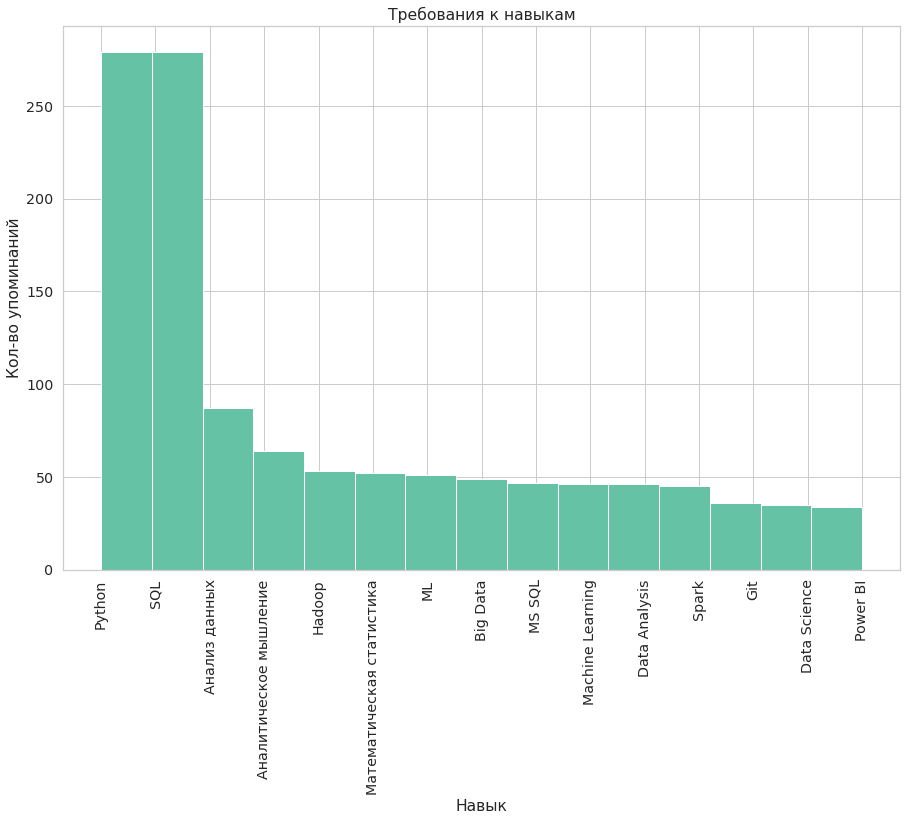

In [503]:
plt.figure(figsize=(15, 10))
ax = plt.hist(x=data['skill'], weights = data['num_req'], bins = 15)
ax = plt.xticks(rotation='vertical')
plt.xlabel('Навык')
plt.ylabel('Кол-во упоминаний')
plt.title('Требования к навыкам')

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Для начала посчитаем "чистую "зарплату в рублях, для этого переведём всю валюту в рубли, а затем, если доход указан до вычета налогов $-$ вычтем 13%. 

Я думаю, что логично будет брать среднее от границ зарплаты, так как, во-первых, в большинстве случаев они несильно отличаются, а во-вторых, хочется посмотреть на перспективу в пару лет, за которые зарплата может спокойно достичь этого уровня.

Сразу же обработаем данные, где указана только одна граница. Вторую границу поставим равной первой.

In [506]:
for i in range(df.shape[0]):
    if df['salary.from'].iloc[i] == np.nan:
        df['salary.from'].iloc[i] = df['salary.to'].iloc[i]
    elif df['salary.to'].iloc[i] == np.nan:
        df['salary.to'].iloc[i] = df['salary.from'].iloc[i]
        
df = df[df['salary.to'].isna() == False]
df = df[df['salary.from'].isna() == False]
df.head()

,id,name,description,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,key_skills,salary
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,200000.0,240000.0,RUR,False,55.838091,37.417167,"[Python, PyTorch, Machine Learning, Spark, SQL]",95398
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,150000.0,200000.0,RUR,False,NaN,NaN,"[Python, ML, A/B тесты, SCALA, Java, Apache Sp...",75885
2,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,150000.0,300000.0,RUR,False,55.718035,37.502857,"[Python, SQL, Pandas, Numpy, Matplotlib]",97566
4,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,40000.0,50000.0,RUR,True,56.838011,60.597465,"[Revenue Management, Information Technology, D...",19513
7,77208642,Data Scientist middle+/Senior,"<p><strong>Немного о компании, в которую ищем ...",250000.0,350000.0,RUR,False,NaN,NaN,"[Spark, Python, SQL, Machine Learning, Машинно...",149526


In [512]:
cur_euro = 80.05
cur_usd = 75.46

tax = 0.13

df['salary'] = 0
for i in range(df.shape[0]):
    df['salary'].iloc[i] = (df['salary.from'].iloc[i] + df['salary.to'].iloc[i])/2
    
    if df['salary.currency'].iloc[i] == 'USD':
        df['salary'].iloc[i] *= cur_usd
    elif df['salary.currency'].iloc[i] == 'EUR':
        df['salary'].iloc[i] *= cur_euro

    if df['salary.gross'].iloc[i] == True:
        df['salary'].iloc[i] *= 1-tax

df['salary'] = df['salary'].apply(round)
df.head()

/tmp/ipykernel_3744/1872950020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] = (df['salary.from'].iloc[i] + df['salary.to'].iloc[i])/2
/tmp/ipykernel_3744/1872950020.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] *= 1-tax
/tmp/ipykernel_3744/1872950020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] *= cur_usd


,id,name,description,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,key_skills,salary
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,200000.0,240000.0,RUR,False,55.838091,37.417167,"[Python, PyTorch, Machine Learning, Spark, SQL]",220000
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,150000.0,200000.0,RUR,False,NaN,NaN,"[Python, ML, A/B тесты, SCALA, Java, Apache Sp...",175000
2,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,150000.0,300000.0,RUR,False,55.718035,37.502857,"[Python, SQL, Pandas, Numpy, Matplotlib]",225000
4,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,40000.0,50000.0,RUR,True,56.838011,60.597465,"[Revenue Management, Information Technology, D...",39150
7,77208642,Data Scientist middle+/Senior,"<p><strong>Немного о компании, в которую ищем ...",250000.0,350000.0,RUR,False,NaN,NaN,"[Spark, Python, SQL, Machine Learning, Машинно...",300000


Text(0.5, 1.0, 'Распределение зарплат')

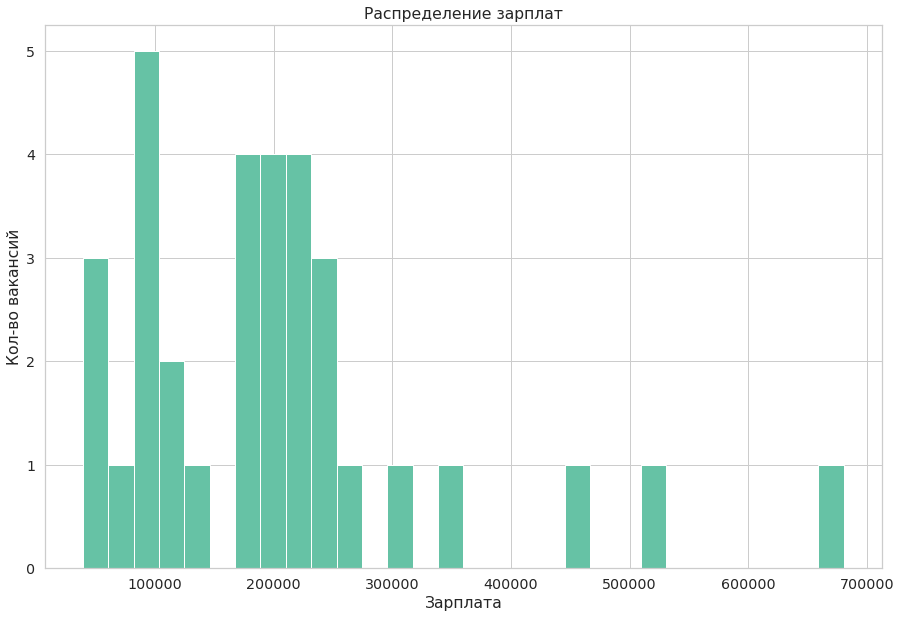

In [516]:
plt.figure(figsize=(15, 10))
ax = plt.hist(x=df['salary'], bins = 30)
plt.xlabel('Зарплата')
plt.ylabel('Кол-во вакансий')
plt.title('Распределение зарплат для DS')

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [520]:
markers = ['Водитель', 'Шофер', 'машина', 'доставщик', 'курьер', 'таксист']

def is_driver(name):
    '''
    Сделаем явную проверку по кодовым словам, чтобы 
    в конечной таблице было меньше неподходящих вакансий
    '''
    
    for m in markers:
        if m.lower() in name.lower():
            return True
    return False

In [521]:
URL = 'https://api.hh.ru/vacancies'

def get_vacancies(job):
    '''
    Будем обращаться к API и брать по 100 вакансий за один запрос
    Далее получим подробную информацию по каждой полученной вакансии и
    добавим её в итоговую таблицу
    '''
    
    params = {
        'text': job,
        'area': 1,
        'page': 0,
        'per_page': 100
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    
    df = pd.DataFrame()
    
    sleep(0.7)
    
    for page in range(data['pages']):
        
        _params = {
            'text': job,
            'area': 1,
            'page': page,
            'per_page': 100
        }

        _req = requests.get(URL, _params)
        _data = json.loads(_req.content.decode()) 
        
        _df = pd.json_normalize(_data['items'])
        
        _df['is_valid'] = _df['name'].apply(is_driver)
        _df = _df[_df['is_valid'] == True]
        
        sleep(0.7)
        
        for i in range(_df.shape[0]):
            
            vacancy = _df['id'].iloc[i]
            vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

            req = requests.get(vacancy_url)
            vacancy_info = json.loads(req.content.decode())
            
            vacancy_pd = pd.json_normalize(vacancy_info)        
            df = pd.concat([df, vacancy_pd])
            
            sleep(0.7)
                
    return df

In [522]:
vacancies = pd.DataFrame()

job_names = ['Водитель', 'Шофер']

for job in job_names:
    _vacancies = get_vacancies(job)
    vacancies = pd.concat([vacancies, _vacancies])

KeyboardInterrupt: 

In [523]:
vacancies = vacancies.drop_duplicates(subset=['id']).reset_index(drop=True)
vacancies.head()

""


In [524]:
features = ['id', 'name', 'description', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross']

In [525]:
df = vacancies[features].copy()
df.head()

KeyError: "None of [Index(['id', 'name', 'description', 'salary.from', 'salary.to',\n       'salary.currency', 'salary.gross'],\n      dtype='object')] are in the [columns]"

In [526]:
for i in range(df.shape[0]):
    if df['salary.from'].iloc[i] == np.nan:
        df['salary.from'].iloc[i] = df['salary.to'].iloc[i]
    elif df['salary.to'].iloc[i] == np.nan:
        df['salary.to'].iloc[i] = df['salary.from'].iloc[i]
        
df = df[df['salary.to'].isna() == False]
df = df[df['salary.from'].isna() == False]
df.head()

,id,name,description,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,key_skills,salary
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,200000.0,240000.0,RUR,False,55.838091,37.417167,"[Python, PyTorch, Machine Learning, Spark, SQL]",220000
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,150000.0,200000.0,RUR,False,NaN,NaN,"[Python, ML, A/B тесты, SCALA, Java, Apache Sp...",175000
2,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,150000.0,300000.0,RUR,False,55.718035,37.502857,"[Python, SQL, Pandas, Numpy, Matplotlib]",225000
4,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,40000.0,50000.0,RUR,True,56.838011,60.597465,"[Revenue Management, Information Technology, D...",39150
7,77208642,Data Scientist middle+/Senior,"<p><strong>Немного о компании, в которую ищем ...",250000.0,350000.0,RUR,False,NaN,NaN,"[Spark, Python, SQL, Machine Learning, Машинно...",300000


In [527]:
cur_euro = 80.05
cur_usd = 75.46

tax = 0.13

df['salary'] = 0
for i in range(df.shape[0]):
    df['salary'].iloc[i] = (df['salary.from'].iloc[i] + df['salary.to'].iloc[i])/2
    
    if df['salary.currency'].iloc[i] == 'USD':
        df['salary'].iloc[i] *= cur_usd
    elif df['salary.currency'].iloc[i] == 'EUR':
        df['salary'].iloc[i] *= cur_euro

    if df['salary.gross'].iloc[i] == True:
        df['salary'].iloc[i] *= 1-tax

df['salary'] = df['salary'].apply(round)
df.head()

/tmp/ipykernel_3744/1872950020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] = (df['salary.from'].iloc[i] + df['salary.to'].iloc[i])/2
/tmp/ipykernel_3744/1872950020.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] *= 1-tax
/tmp/ipykernel_3744/1872950020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'].iloc[i] *= cur_usd


,id,name,description,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,key_skills,salary
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,200000.0,240000.0,RUR,False,55.838091,37.417167,"[Python, PyTorch, Machine Learning, Spark, SQL]",220000
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,150000.0,200000.0,RUR,False,NaN,NaN,"[Python, ML, A/B тесты, SCALA, Java, Apache Sp...",175000
2,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,150000.0,300000.0,RUR,False,55.718035,37.502857,"[Python, SQL, Pandas, Numpy, Matplotlib]",225000
4,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,40000.0,50000.0,RUR,True,56.838011,60.597465,"[Revenue Management, Information Technology, D...",39150
7,77208642,Data Scientist middle+/Senior,"<p><strong>Немного о компании, в которую ищем ...",250000.0,350000.0,RUR,False,NaN,NaN,"[Spark, Python, SQL, Machine Learning, Машинно...",300000


Text(0.5, 1.0, 'Распределение зарплат для водителя')

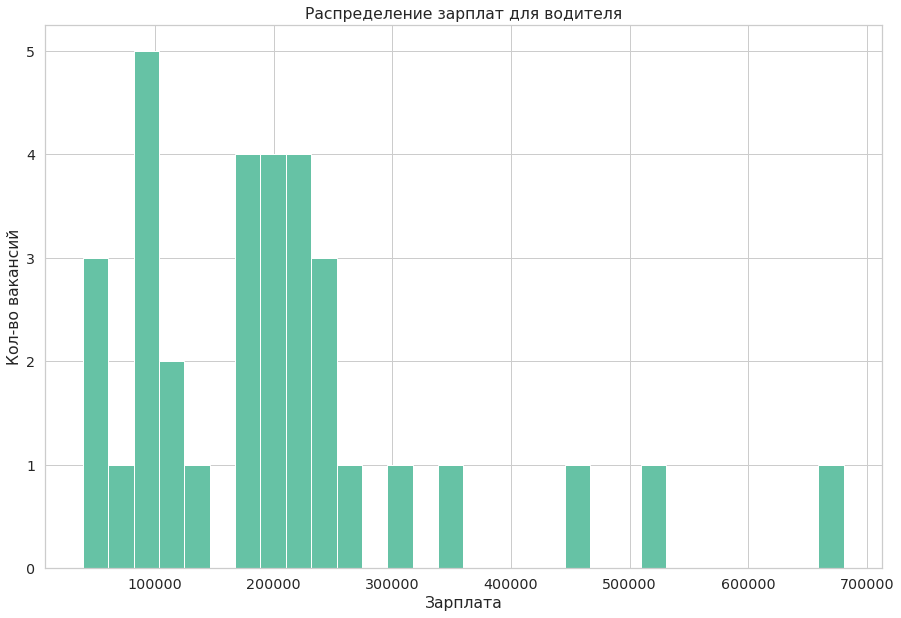

In [528]:
plt.figure(figsize=(15, 10))
ax = plt.hist(x=df['salary'], bins = 30)
plt.xlabel('Зарплата')
plt.ylabel('Кол-во вакансий')
plt.title('Распределение зарплат для водителя')

Не забывайте про выводы.

# Выводы

#### Data Scientist:

При поиске по этой профессии сайт выдаёт довольно много выбросов $-$ примерно половину, которые мягко говоря слабо связаны с анализом данных, поэтому мне пришлось вводить маркеры, чтобы отбирать полученные вакансии.

В первую очередь data scientist'у необходимо знать Питон и Базы данных $-$ это самые необходимые навыки. Также стоит упомянуть про требование знать мат. статистику, ведь математики в анализе данных не меньше, чем программирования.

После анализа зарплат можно сделать вывод, что профессия довольно прибыльная и много работодателей готовы платить приличные деньги за работу.


#### Водитель:

Самая обычная профессия, средняя для Москвы зарплата, на неё имеется довольно большой спрос. 

Если я не пойду в Data Science, то всегда есть запасной вариант.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [529]:
features = ['id', 'name', 'address.lat', 'address.lng', ]

df = vacancies[features].copy()
df.head()

KeyError: "None of [Index(['id', 'name', 'address.lat', 'address.lng'], dtype='object')] are in the [columns]"

Разобьём регион по районам:

In [530]:
df['longitude'] = df['address.lng'].apply(lambda x: 0.25 * np.round(x * 4, decimals=1))
df['latitude'] = df['address.lat'].apply(lambda y: 0.25 * np.round(y * 4, decimals=1))

Посмтроим тепловую карту по количеству вакансий на  район.

Text(0.5, 1.0, 'Тепловая карта количества компаний по району')

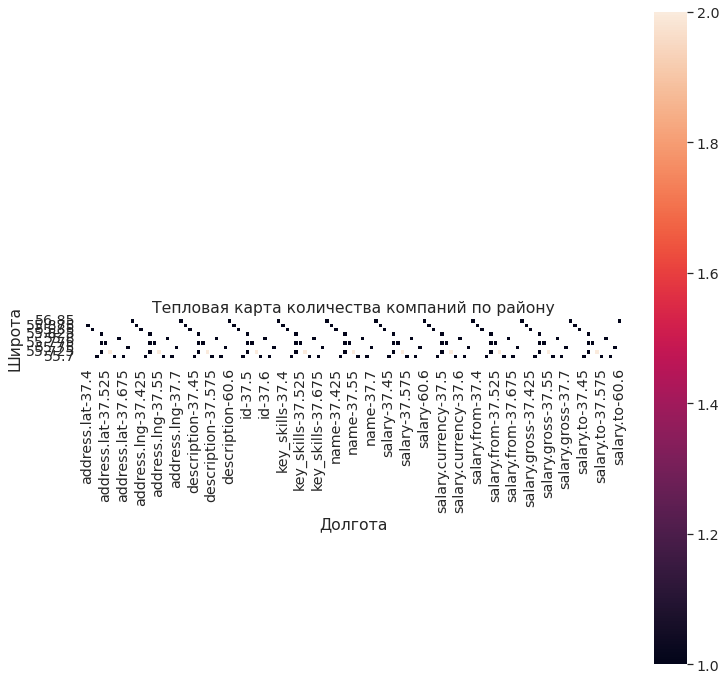

In [531]:
table = pd.pivot_table(df, index='latitude', columns='longitude', aggfunc=np.size)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(table, square=True, linewidths=1)
heatmap.invert_yaxis()
heatmap.set_xlabel('Долгота')
heatmap.set_ylabel('Широта')
heatmap.set_title('Тепловая карта количества компаний по району')

Какие выводы можно сделать из построенных графиков?


Как и ожидалось, большинство вакансий сосредоточены в центре Москвы.